***Introduction***

This project consists of two parts: prioritization of hypotheses and analysis of the A/B test.

In the first part, it will be necessary to check which of the available hypotheses are the most priority using two methods ICE and RICE. To do this, we have all the data to which we will need to apply formulas for calculating the ICE and ICE coefficients

In the second part, an analysis of the A/B test will be carried out. For this analysis, two tables with data on orders and on visitors will be used.

Before starting the analysis, we import all the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np

# Prioritization of hypotheses

## ICE

In [15]:
hypotheses['ICE']= round(hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts'], 2)

display(hypotheses.sort_values(by='ICE', ascending=False))
pd.options.display.max_colwidth = 130

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


When using ICE, the prioritization of hypotheses has changed. Hypothesis number 8 took the first place (To launch a promotion giving a discount on a product on a birthday), hypothesis number 0 took the second place (To add two new traffic channels, which will attract 30% more users), and number 7 took the third place (To add a subscription form to all the main ones pages to collect a customer base for email newsletters).

## RICE


In [16]:
hypotheses['RICE']= round(hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts'], 2)

display(hypotheses.sort_values(by='RICE', ascending=False))
pd.options.display.max_colwidth = 130

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


When using RICE, the distribution of hypotheses has changed slightly, hypothesis number 7 is now in second place (Add a subscription form to all main pages to collect a customer base for email newsletters), hypothesis number 2 has risen to second place (Add product recommendation blocks to the online store's website to increase conversion and average order receipt). This was due to the consideration of another indicator - coverage. And in third place was hypothesis number 0 (Add two new traffic channels, which will attract 30% more users).

# Часть два

## Выгрузка данных

In [4]:
orders = pd.read_csv('orders.csv')

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv('visitors.csv')

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


print(orders.head())

print(visitors.head()) 

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [5]:
print(orders.duplicated().value_counts())

print(visitors.duplicated().value_counts())

False    1197
dtype: int64
False    62
dtype: int64


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


No duplicates were found. According to the information about the data tables, there are no gaps in the data.

In [8]:
print('The beginning of the interval for the study:',orders['date'].min())
print('The end of the interval for the study:',orders['date'].max())

The beginning of the interval for the study: 2019-08-01 00:00:00
The end of the interval for the study: 2019-08-31 00:00:00


In [9]:
cnt_visitors_by_group = orders.pivot_table(index='group', values='visitorId', aggfunc='count')
cnt_visitors_by_group

,visitorId
group,
A,557
B,640


We have two groups in the test. And in group B we have 640 visitors, and in group A 557

## Cumulative revenue by group

In [10]:
data = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

ordersAggr = data.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis = 1).\
sort_values(by=['date','group'])

ordersAggr.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

visitorsAggr = data.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'], x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1).sort_values(by=['date','group'])

cummulativeData = ordersAggr.merge(visitorsAggr, left_on=['date', 'group'], right_on=['date', 'group'])

In [11]:
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


We prepared a cumulative table by combining data from orders and visitors, which included the date, group (A/C), number of customers, revenue, number of orders and number of visitors. Next, we will plot the cumulative revenue by group.

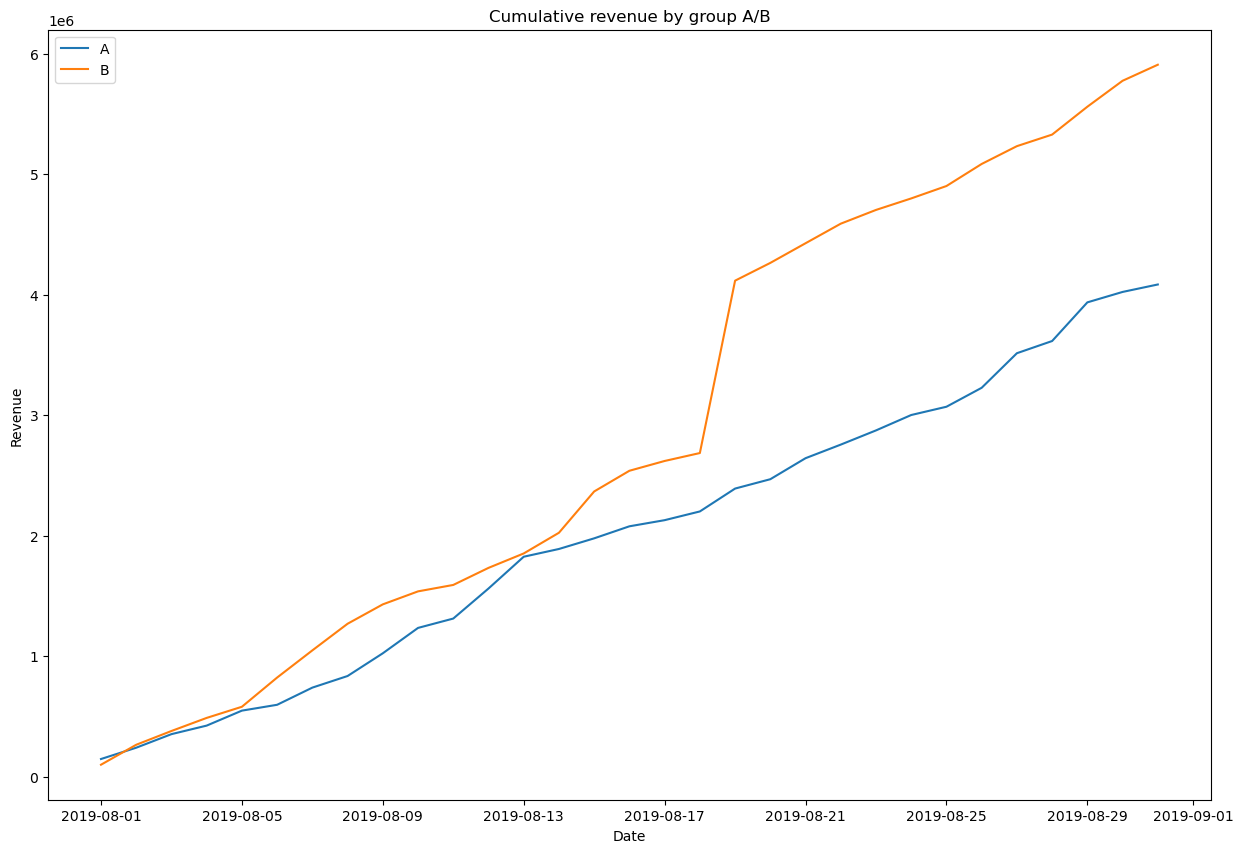

In [12]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

plt.figure(figsize=(15,10))

plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue'], label = 'A')

plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue'], label = 'B')

plt.title('Cumulative revenue by group A/B')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend() 
plt.show();

Most of the revenue is generated by Group B, and over time, it is for Group B that revenue has the greatest growth. By the end of the period, the gap between the groups' revenue is only getting bigger. But for both groups, revenue is growing throughout the period. There is one sharp jump in the revenue of Group B, there could be a surge in the number of orders, or more expensive orders were made

## Cumulative average check by group

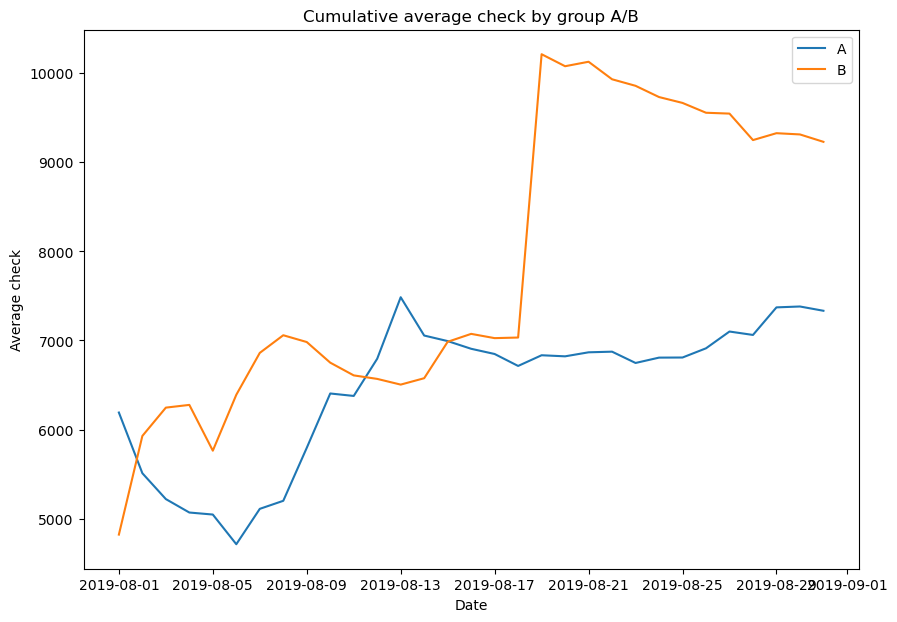

In [13]:
plt.figure(figsize=(10,7))

plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue']/cummulativeDataA['orders'], label = 'A')

plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue']/cummulativeDataB['orders'], label = 'B')

plt.title('Cumulative average check by group A/B')
plt.ylabel('Average check')
plt.xlabel('Date')
plt.legend()
plt.show();

The gap in the average check also increases by the end of the period, which may just indicate that at some point more expensive orders began to appear in group B, since the charts with the average check also show a jump in the size of the group B check

## The relative change in the cumulative average check of group B to group A

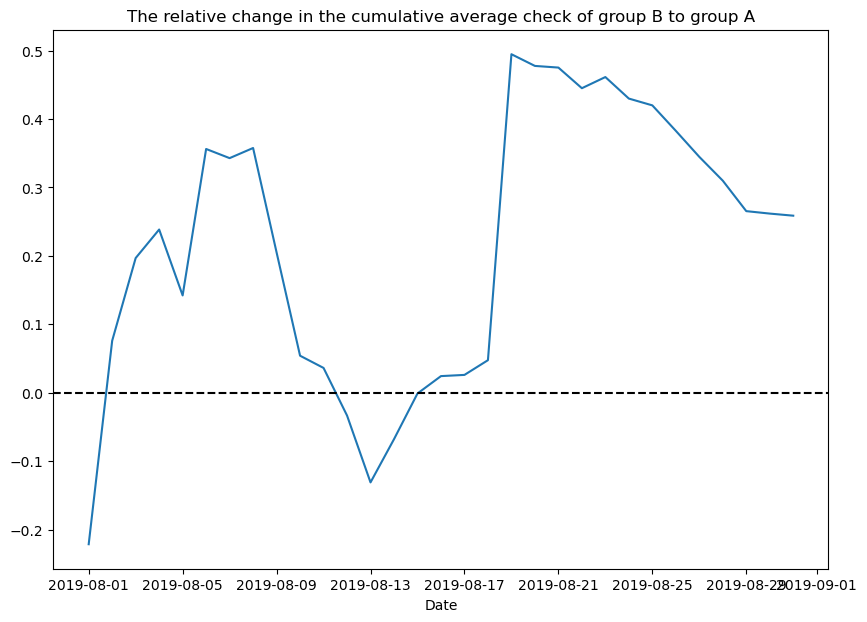

In [14]:
mergedCummulativeData = cummulativeDataA.merge(cummulativeDataB, left_on='date', right_on='date', suffixes=['A', 'B'])

plt.figure(figsize=(10,7))

plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['revenueB']/mergedCummulativeData['ordersB'])/(mergedCummulativeData['revenueA']/mergedCummulativeData['ordersA'])-1))

plt.title('The relative change in the cumulative average check of group B to group A')
plt.xlabel('Date')
plt.axhline(y=0, color='black', linestyle = '--')
plt.show();

At several points, the graph of the difference between the segments changes dramatically, that is, the assumption of abnormal order values is correct.

## Cumulative average number of orders per user by group

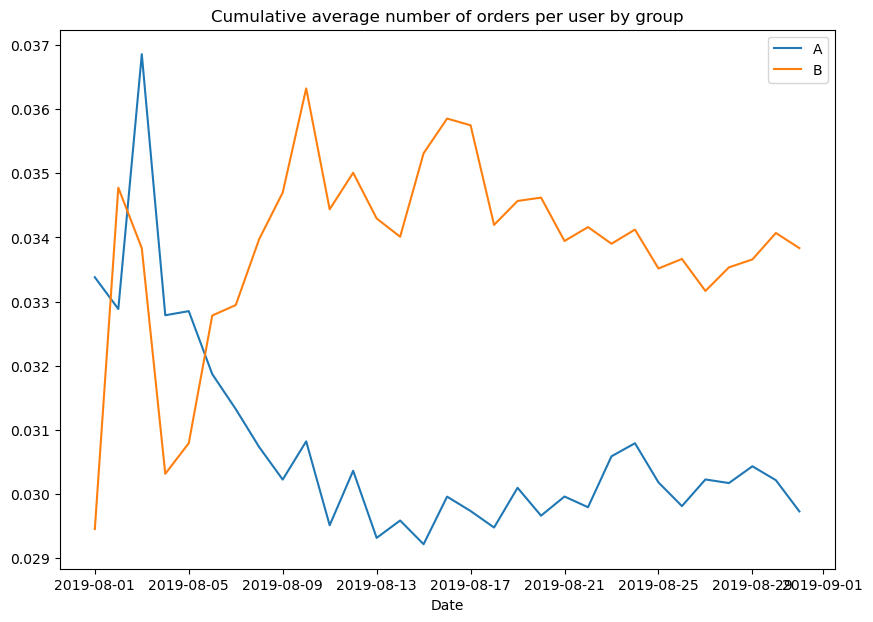

In [15]:
mergedCummulativeData['orders_to_usersA'] =  mergedCummulativeData['ordersA'] / mergedCummulativeData['visitorsA'] 

mergedCummulativeData['orders_to_usersB'] =  mergedCummulativeData['ordersB'] / mergedCummulativeData['visitorsB']

plt.figure(figsize=(10,7))

plt.plot(mergedCummulativeData['date'], mergedCummulativeData['orders_to_usersA'], label='A')

plt.plot(mergedCummulativeData['date'], mergedCummulativeData['orders_to_usersB'], label='B')

plt.title('Cumulative average number of orders per user by group')
plt.xlabel('Date')
plt.legend()
plt.show();

The average number of orders from group A has a sharp drop at the beginning, and group B shows an increase in the number of average orders throughout the period.

## The relative change in the cumulative average number of orders per visitor of group B to group A

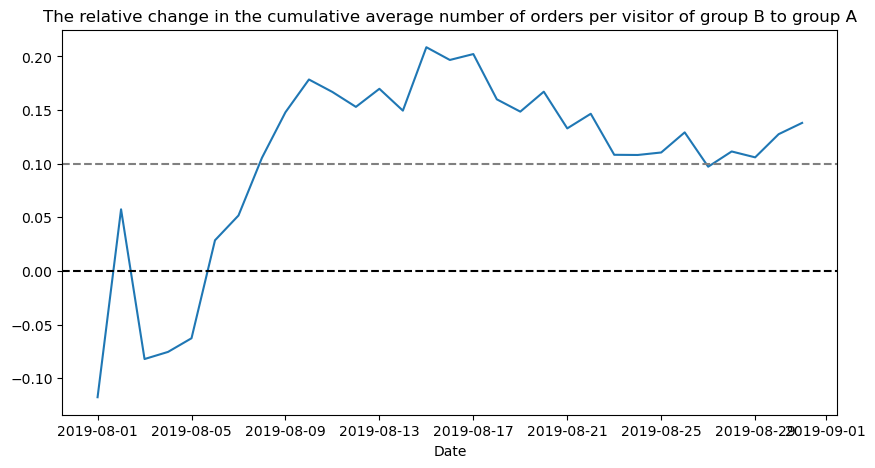

In [16]:
plt.figure(figsize=(10,5))

plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['orders_to_usersB']/mergedCummulativeData['orders_to_usersA'])-1))

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('The relative change in the cumulative average number of orders per visitor of group B to group A')
plt.xlabel('Date')
plt.show();

The cumulative average number of orders in Group B is consistently 10% higher than in Group A.

## A dot graph of the number of orders by user

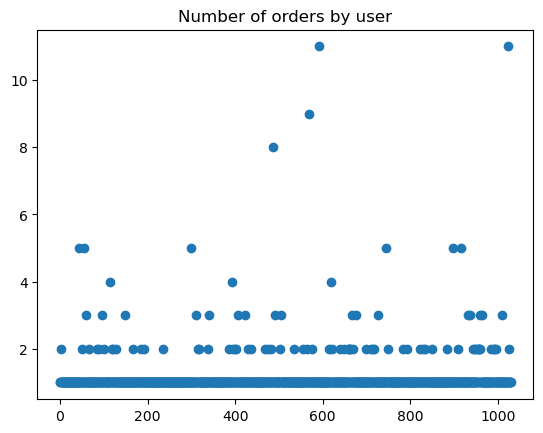

In [17]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})

ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title('Number of orders by user')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show();

From the graph above, we can conclude that site visitors most often make only one order, data on visitors with more than one order count is outliers.

## Calculation of the 95th and 99th percentiles of the number of orders per user

In [18]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print(percentiles)

[2. 4.]


***Only 5% of users place more than 2 orders.*** That is, it is reasonable to select 2 orders per visitor beyond the upper limit of the number of orders, then clean the data on it

## Dot chart of the cost of orders

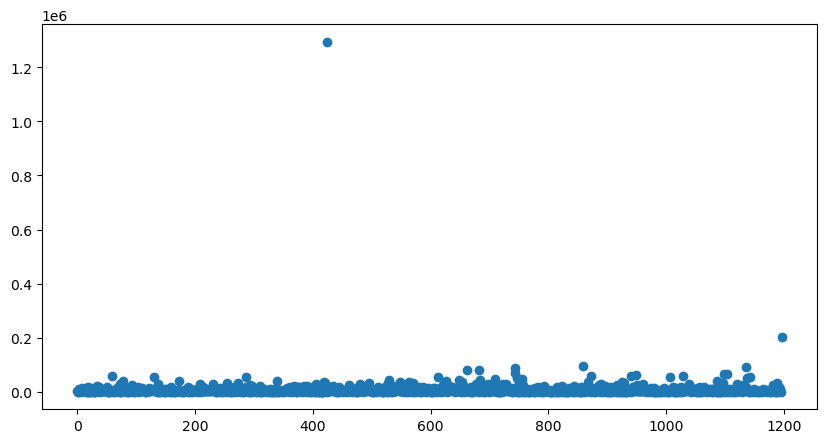

In [19]:
x_values = pd.Series(range(0, len(orders)))

plt.figure(figsize=(10,5))

plt.scatter(x_values, orders['revenue'])


According to the schedule, without restrictions on the cost of the order, it can be seen that all orders with a cost above about 40 thousand are abnormal for this study.

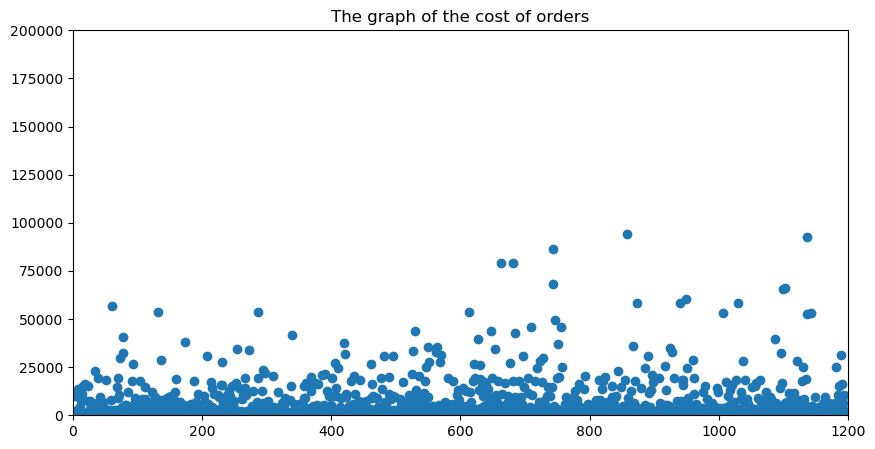

In [20]:
x_values = pd.Series(range(0, len(orders)))

plt.figure(figsize=(10,5))

plt.scatter(x_values, orders['revenue'])

plt.title('The graph of the cost of orders')
plt.axis([0, 1200, 0, 200000])
plt.show();

As expected, most of the orders in value are in the range of about 25,000

## Calculation of the 95th and 99th percentiles of the cost of orders

In [21]:
percentiles = np.percentile(orders['revenue'], [95, 99])

print(percentiles)

[28000.  58233.2]


***5% of orders are more expensive than 28,000 rubles***

## Statistical significance of differences in the average number of orders per visitor

Preparation of the "raw" data

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 
ordersByUsersB

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [24]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [25]:
alpha = 0.05

## Statistical significance of differences in the average number of orders per visitor between groups based on "raw" data

A hypothesis is being put forward

***H0***: there are no differences in the average number of orders per visitor between groups A and B according to the "raw" data.

***H1***: there are differences in the average number of orders per visitor between the groups according to the "raw" data.

In [26]:
#Calculation of the statistical significance of differences in the average number of orders per visitor
#between groups between groups based on "raw" data

results = st.mannwhitneyu(sampleA, sampleB)

print('P-value:{0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Relative change in the average number of orders in group B relative to group A:{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

if results.pvalue < alpha:
    print('The differences in the average number of orders per visitor between the "raw" groups are statistically significant')
else:
    print('There are no differences in the average number of orders per visitor between the "raw" groups')

P-value:0.017
Relative change in the average number of orders in group B relative to group A:0.138
The differences in the average number of orders per visitor between the "raw" groups are statistically significant


Since the p-value is less than alpha, we reject the null hypothesis. However, the change in the average number of orders in group B relative to group A is 13.8%

## Statistical significance of differences in the average order receipt between groups based on "raw" data

A hypothesis is being put forward

***H0***: there are no differences in the average check between groups A and B according to the "raw" data.

***H1***: there are differences in the average check between the groups according to the "raw" data.

In [27]:
#calculation of the relative differences in the average check between the groups

results_1 = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('P-value:{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('The relative change in the average check in group B relative to group A:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

if results_1.pvalue < alpha:
    print('According to the "raw" data, the differences in average receipts in groups A and B are statistically significant')
else:
    print('According to the "raw" data, there are no differences in average receipts in groups A and B')

P-value:0.729
The relative change in the average check in group B relative to group A: 0.259
According to the "raw" data, there are no differences in average receipts in groups A and B


The P-value is greater than alpha, therefore we accept the null hypothesis that there are no differences in the average check between the groups based on the "raw" data

## Statistical significance of differences in the average number of orders per visitor between groups between groups based on "cleared" data

In [28]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],],axis=0,)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

In [29]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],\
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
               name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],\
     pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)

In [30]:
results_2 = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

A hypothesis is being put forward

***H0***: there are no differences in the average number of orders per visitor between groups A and B according to the cleared data.

***H1***: there are differences in the average number of orders per visitor between the groups according to the cleared data.

In [31]:
print('P-value:{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Relative change in the average number of orders in group B relative to group A:{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

if results_2.pvalue < alpha:
    print('According to the cleared data, the differences in the average number of orders per visitor in groups A and B are statistically significant')
else:
    print('According to the cleared data, there are no differences in the average number of orders per visitor in groups A and B')

P-value:0.013
Relative change in the average number of orders in group B relative to group A:0.173
According to the cleared data, the differences in the average number of orders per visitor in groups A and B are statistically significant


Since the p-value for the cleaned data has decreased slightly in comparison with this indicator for raw data, we reject the null hypothesis. And the change in the average number of orders in group B relative to group A increased to 17%

## Statistical significance of differences in the average order receipt between groups based on "cleared" data

A hypothesis is being put forward

***H0***: the differences in the average check between groups A and B according to the cleared data are statistically significant.

***H1***: differences in the average check between groups A and B according to the cleared data are not statistically significant.

In [32]:
print('P-value:{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
               np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],\
               orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].\
               isin(abnormalUsers)),)]['revenue'],)[1]))

print('The relative change in the average check in group B relative to group A:','{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B',\
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/\
                orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].\
                isin(abnormalUsers)),)]['revenue'].mean()- 1)) 

if results_2.pvalue < alpha:
    print('According to the cleared data, the differences in the average order receipt in groups A and B are statistically significant')
else:
    print('According to the cleared data, there are no differences in the average order receipt per visitor in groups A and B')

P-value:0.738
The relative change in the average check in group B relative to group A: -0.020
According to the cleared data, the differences in the average order receipt in groups A and B are statistically significant


The P-value has increased slightly, therefore we accept the null hypothesis that there are no differences in the average check between the groups based on the already cleared data.
After clearing the data, the difference in the average check between the groups became minimal

# Conclusion

For the first part:

During the prioritization of hypotheses, it was concluded that the hypotheses numbered 7, 0 and 2 are the most important, such a conclusion was obtained through the use of RICE. It differs slightly from the output after using ICE, but we rely on the total for RICE, since it also takes into account coverage.

For the second part:

Cumulative data on revenue, average receipt and number of orders per visitor were the leaders in Group B almost all the time. Studying the graphs, sharp fluctuations were noticeable in the cumulative average check in group B, after which it was assumed that abnormal values were present. The data was cleared, after that the difference between the average checks decreased, as can be seen from the conclusion in paragraph 2.15.
Before and after clearing the data, the indicator of the ratio of the number of orders to visitors in group B is higher than this indicator in group A, it increased from 13.8 to 17.3. Such a change in indicators allows us to conclude that the test can be stopped and the victory of group B.